## Images from OFIQ results

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

In [63]:

def Unified_quality_score(data_path):
    # Load the dataset
    df = pd.read_csv(data_path, sep=';')

    # Histograms for scalar scores
    scalar_columns = ['UnifiedQualityScore.scalar']
    df[scalar_columns].hist(bins=20, figsize=(20, 15))
    plt.suptitle('Histograms of Scalar Scores')
    plt.show()


    # Improved Box plots for raw scores with Seaborn
    raw_columns = ['UnifiedQualityScore']
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[raw_columns], palette="Set2")
    plt.xticks(rotation=45)
    plt.title('Box Plots of UnifiedQualityScore')
    plt.show()

    # # Scatter plot
    # plt.figure(figsize=(10, 6))
    # sns.scatterplot(x='UnifiedQualityScore', y='Sharpness', data=df, hue='Sharpness', palette='coolwarm', size='Sharpness', sizes=(20, 200))
    # plt.title('Scatter Plot of Unified Quality Score')
    # plt.show()


    # Additional plots can be added based on specific needs or interests


### Show both sides of top 50% of data

In [218]:
data_path_children = '../..//data/OFIQ_results/children_all_final.csv'


In [219]:
df = pd.read_csv(data_path_children, sep=';')

In [220]:
df.drop_duplicates(subset=['UnifiedQualityScore', "BackgroundUniformity", "IlluminationUniformity", "LuminanceMean"], inplace=True)

In [221]:
def id_class(im_enter):
    if "." in im_enter[:-4]:
        im = im_enter.split("_")[0]
    else:
        im = "_".join(im_enter.split("_")[:2])
    return im

In [222]:
# Convert file names to ID
df['full_img_name'] = df['Filename'].apply(lambda x: x.split('/')[-1])
df['ID'] = df['Filename'].apply(lambda x: x.split('/')[-1][:-4])
df['id_class'] = df['full_img_name'].apply(lambda x: id_class(x))

In [223]:
df_uni_50_quantile = df["UnifiedQualityScore.scalar"].quantile(0.5)

In [225]:
df_canonical = df[df["UnifiedQualityScore.scalar"] > df_uni_50_quantile].sort_values(by="UnifiedQualityScore.scalar", ascending=True)
df_canonical["UnifiedQualityScore.scalar"].describe()

count    1601.000000
mean       48.983136
std        14.635457
min        30.000000
25%        36.000000
50%        46.000000
75%        59.000000
max        96.000000
Name: UnifiedQualityScore.scalar, dtype: float64

In [226]:
df_canonical

,Filename,UnifiedQualityScore,BackgroundUniformity,IlluminationUniformity,LuminanceMean,LuminanceVariance,UnderExposurePrevention,OverExposurePrevention,DynamicRange,Sharpness,...,UpwardCropOfTheFaceImage.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,ExpressionNeutrality.scalar,NoHeadCoverings.scalar,Unnamed: 57,full_img_name,ID,id_class
2337,../../../data/tests/images/children_moving/chu...,20.769053,167.669845,0.572715,0.182761,0.010111,0.159616,0.0,6.503177,-3,...,0,100,96,100,24,100,NaN,African_758_3.png,African_758_3,African_758
2406,../../../data/tests/images/children_moving/chu...,20.831568,88.350900,0.255661,0.479772,0.042624,0.013648,0.0,7.044647,-35,...,0,98,99,100,16,100,NaN,Asian_107_5.png,Asian_107_5,Asian_107
2080,../../../data/tests/images/children_moving/chu...,20.812883,152.620682,0.197846,0.297609,0.033663,0.118869,0.0,7.358586,-30,...,0,99,94,100,74,0,NaN,African_535_41.png,African_535_41,African_535
2084,../../../data/tests/images/children_moving/chu...,20.739841,109.771184,0.595625,0.094988,0.006169,0.693033,0.0,5.913562,46,...,0,100,85,100,49,100,NaN,African_536_0.png,African_536_0,African_536
1476,../../../data/tests/images/children_moving/chu...,20.849339,72.550981,0.012346,0.530994,0.035396,0.003677,0.0,7.494499,-33,...,5,96,100,100,47,100,NaN,m.06t5x__0003.jpg,m.06t5x__0003,m.06t5x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,../../../data/tests/images/children_moving/chu...,29.269821,122.410994,0.772518,0.359829,0.022157,0.057632,0.0,7.095510,-28,...,0,94,100,100,44,100,NaN,Asian_403_20.png,Asian_403_20,Asian_403
1460,../../../data/tests/images/children_moving/chu...,29.558527,240.599062,0.467401,0.277892,0.018240,0.076771,0.0,7.074327,-12,...,1,97,97,100,11,100,NaN,m.061b24_0001.jpg,m.061b24_0001,m.061b24
1591,../../../data/tests/images/children_moving/chu...,29.761318,221.007784,0.446311,0.228390,0.011000,0.128921,0.0,6.732918,-35,...,9,99,100,100,71,100,NaN,m.0dryml1_0004.jpg,m.0dryml1_0004,m.0dryml1
1643,../../../data/tests/images/children_moving/chu...,30.143625,17.603701,0.639273,0.278400,0.023737,0.132029,0.0,7.232935,-38,...,6,98,99,100,24,100,NaN,m.0hht8wn_0001.jpg,m.0hht8wn_0001,m.0hht8wn


In [215]:
df_non_canonical = df[df["UnifiedQualityScore.scalar"] <= df_uni_50_quantile].sort_values(by="UnifiedQualityScore.scalar", ascending=True)
df_non_canonical["UnifiedQualityScore.scalar"].describe()


count    1693.000000
mean       17.121087
std         7.069654
min         2.000000
25%        11.000000
50%        17.000000
75%        23.000000
max        29.000000
Name: UnifiedQualityScore.scalar, dtype: float64

In [216]:
df_non_canonical

,Filename,UnifiedQualityScore,BackgroundUniformity,IlluminationUniformity,LuminanceMean,LuminanceVariance,UnderExposurePrevention,OverExposurePrevention,DynamicRange,Sharpness,...,UpwardCropOfTheFaceImage.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,ExpressionNeutrality.scalar,NoHeadCoverings.scalar,Unnamed: 57,full_img_name,ID,id_class
190,../../../data/tests/images/children_moving/chu...,13.271646,184.094328,0.560249,0.159977,0.029628,0.477283,0.000000,6.535153,46,...,0,99,93,91,31,0,NaN,African_252_0.png,African_252_0,African_252
3142,../../../data/tests/images/children_moving/chu...,12.883618,157.110529,0.133787,0.397188,0.043436,0.013398,0.000000,7.271743,-38,...,0,42,89,92,50,100,NaN,Caucasian_1399_20.png,Caucasian_1399_20,Caucasian_1399
209,../../../data/tests/images/children_moving/chu...,12.735619,140.040805,0.513850,0.259023,0.033733,0.206090,0.000000,7.244581,46,...,0,77,56,94,57,0,NaN,Caucasian_36_68.png,Caucasian_36_68,Caucasian_36
3178,../../../data/tests/images/children_moving/chu...,13.233381,140.826848,0.754286,0.240537,0.008958,0.044347,0.000000,5.942014,35,...,0,98,93,99,28,100,NaN,Caucasian_194_10.png,Caucasian_194_10,Caucasian_194
2948,../../../data/tests/images/children_moving/chu...,12.845308,550.812601,0.269054,0.390212,0.037476,0.096891,0.000000,7.441902,-38,...,0,100,99,100,24,0,NaN,Caucasian_1016_9.png,Caucasian_1016_9,Caucasian_1016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,../../../data/tests/images/children_moving/chu...,20.684898,68.836203,0.023669,0.227287,0.020213,0.182460,0.000000,6.984332,8,...,0,99,98,100,76,100,NaN,African_665_1.png,African_665_1,African_665
952,../../../data/tests/images/children_moving/chu...,20.656549,66.900897,0.614694,0.266476,0.041419,0.082666,0.000105,6.504994,-28,...,0,87,99,100,19,100,NaN,Indian_531_13.png,Indian_531_13,Indian_531
960,../../../data/tests/images/children_moving/chu...,20.709999,95.921324,0.511322,0.151666,0.010498,0.409980,0.000000,6.534259,-33,...,0,99,97,100,72,0,NaN,Indian_532_9.png,Indian_532_9,Indian_532
3167,../../../data/tests/images/children_moving/chu...,20.722321,168.665593,0.740997,0.460328,0.013821,0.011366,0.000000,6.578130,-22,...,0,100,87,100,90,0,NaN,Caucasian_170_0.png,Caucasian_170_0,Caucasian_170


In [217]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images(image_names, directory, num_cols=5, title=None):
    num_images = len(image_names)
    num_rows = (num_images + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))
    
    for i, image_name in enumerate(image_names):
        row = i // num_cols
        col = i % num_cols
        
        # Search for the image recursively in the directory
        for root, dirs, files in os.walk(directory):
            if image_name in files:
                # Construct the full path to the image
                image_path = os.path.join(root, image_name)
                
                # Display the image
                img = mpimg.imread(image_path)
                axes[row, col].imshow(img)
                axes[row, col].set_title(image_name)
                axes[row, col].axis('off')
                break
        else:
            print(f"Image '{image_name}' not found in directory '{directory}'.")
    
    # Hide any unused subplots
    for i in range(num_images, num_rows*num_cols):
        row = i // num_cols
        col = i % num_cols
        axes[row, col].axis('off')
    
    #plt.tight_layout()
    fig.suptitle(title)
    plt.show()

scores [30, 30, 30, 30, 30, 30, 30, 30, 30, 30]


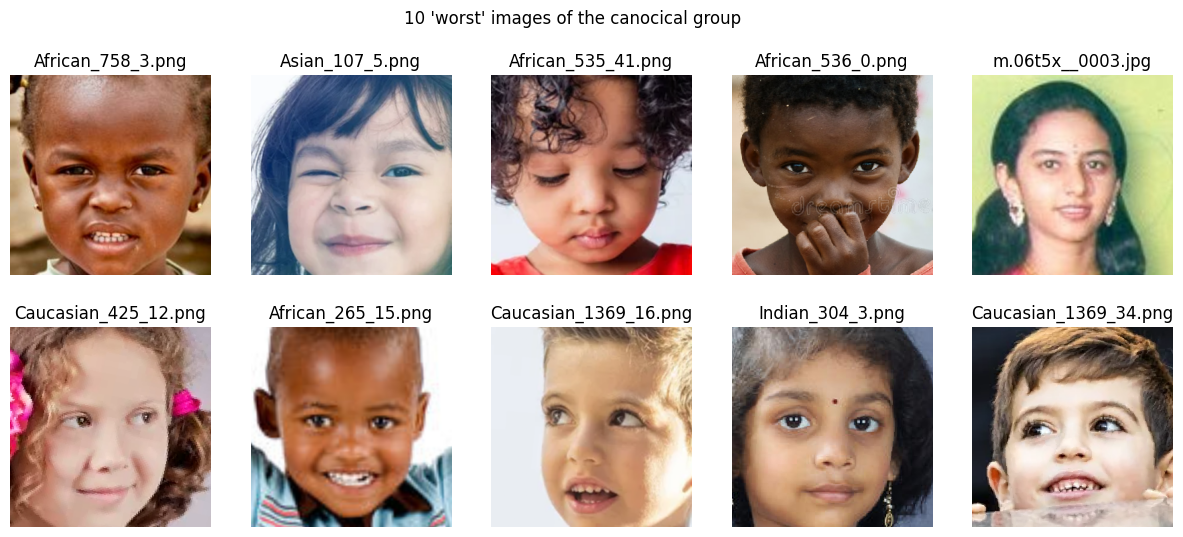

In [227]:
top_score_faces = list(df_canonical["full_img_name"].head(10))
top_score_ids = list(df_canonical["id_class"].head(10))

# usage top score
image_names = top_score_faces
directory = '../../data/raw_full/children'
print("scores", list(df_canonical["UnifiedQualityScore.scalar"].head(10)))

display_images(image_names, directory, title="10 'worst' images of the canocical group")


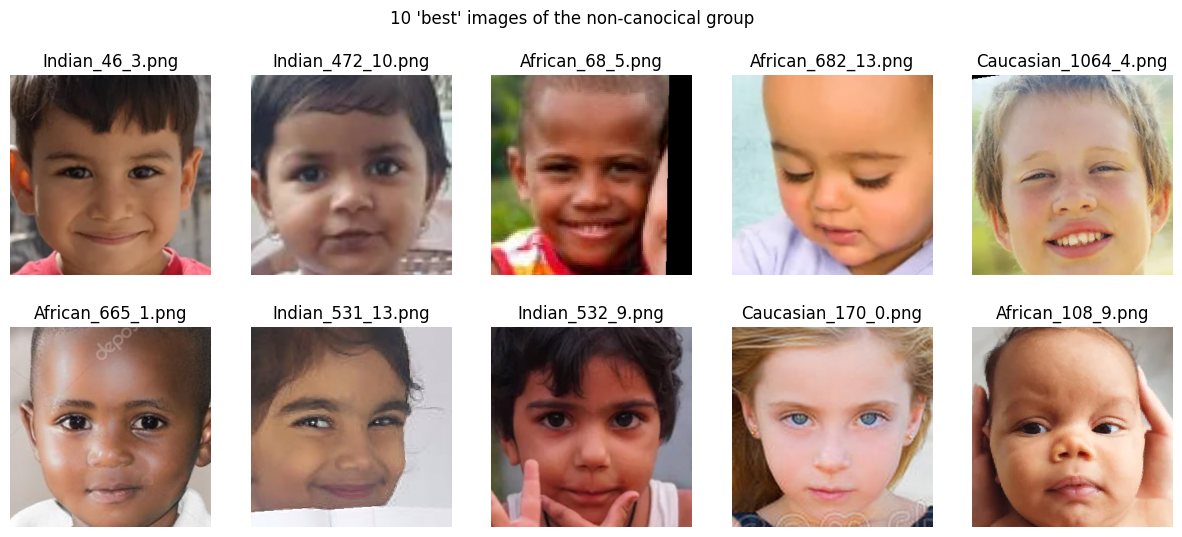

scores [29, 29, 29, 29, 29, 29, 29, 29, 29, 29]


In [231]:
# Example usage
# Get top 50% + 10 of the data
top_score_faces = list(df_non_canonical["full_img_name"].tail(10))
top_score_ids = list(df_non_canonical["id_class"].tail(10))


image_names = top_score_faces
directory = '../../data/raw_full/children'

display_images(image_names, directory, title="10 'best' images of the non-canocical group")
print("scores", list(df_non_canonical["UnifiedQualityScore.scalar"].tail(10)))


In [168]:
# Get top 10 of the data with lowest unified quality score
df_low10 = df_sorted.head(10).reset_index(drop=True)
top_low_score_faces = list(df_low10["full_img_name"])

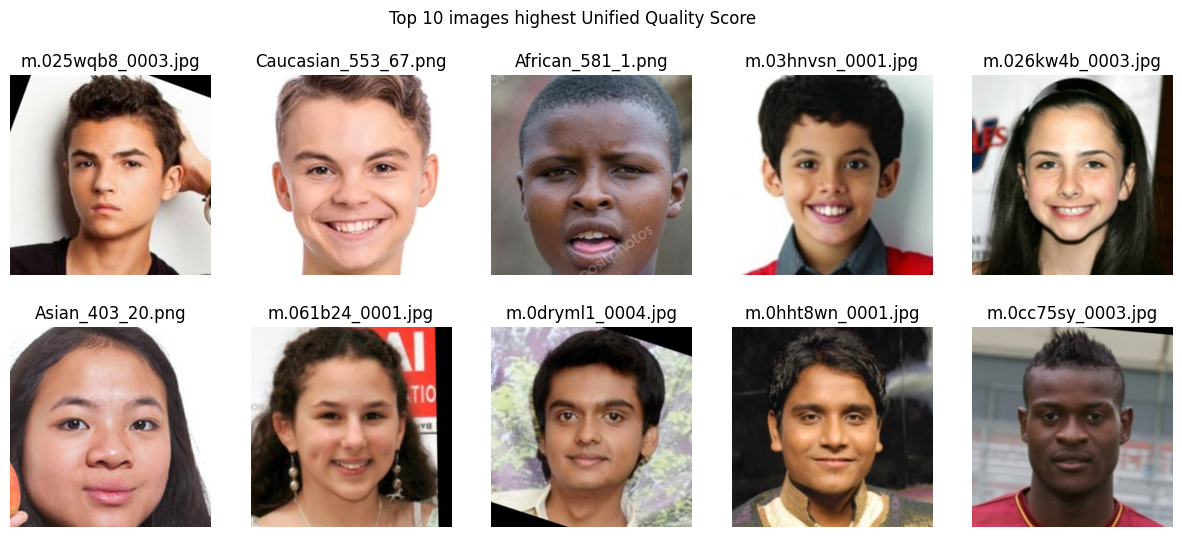

scores [90, 90, 91, 91, 91, 92, 93, 93, 94, 96]


In [233]:
# Example usage

# Get top lowest 10 of the data
high_score_faces = list(df_canonical["full_img_name"].tail(10))
high_score_ids = list(df_canonical["id_class"].tail(10))



image_names = high_score_faces
directory = '../../data/raw_full/children'

display_images(image_names, directory, title="Top 10 images highest Unified Quality Score")
print("scores", list(df_canonical["UnifiedQualityScore.scalar"].tail(10)))

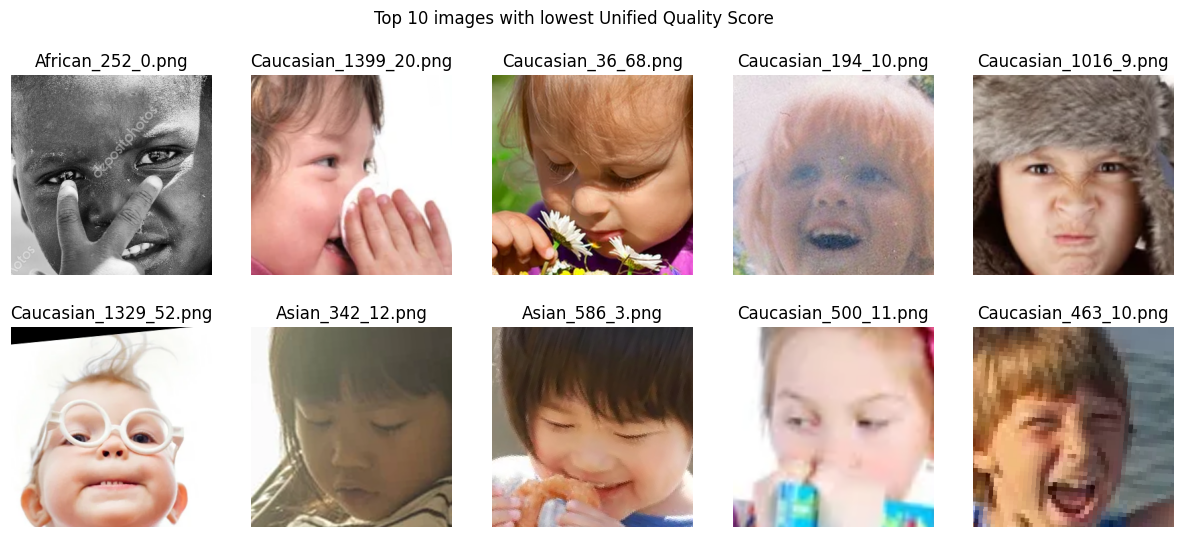

scores [2, 2, 2, 2, 2, 2, 2, 2, 3, 3]


In [232]:
# Example usage

# Get top lowest 10 of the data
low_score_faces = list(df_non_canonical["full_img_name"].head(10))
low_score_ids = list(df_non_canonical["id_class"].head(10))



image_names = low_score_faces
directory = '../../data/raw_full/children'

display_images(image_names, directory, title="Top 10 images with lowest Unified Quality Score")
print("scores", list(df_non_canonical["UnifiedQualityScore.scalar"].head(10)))


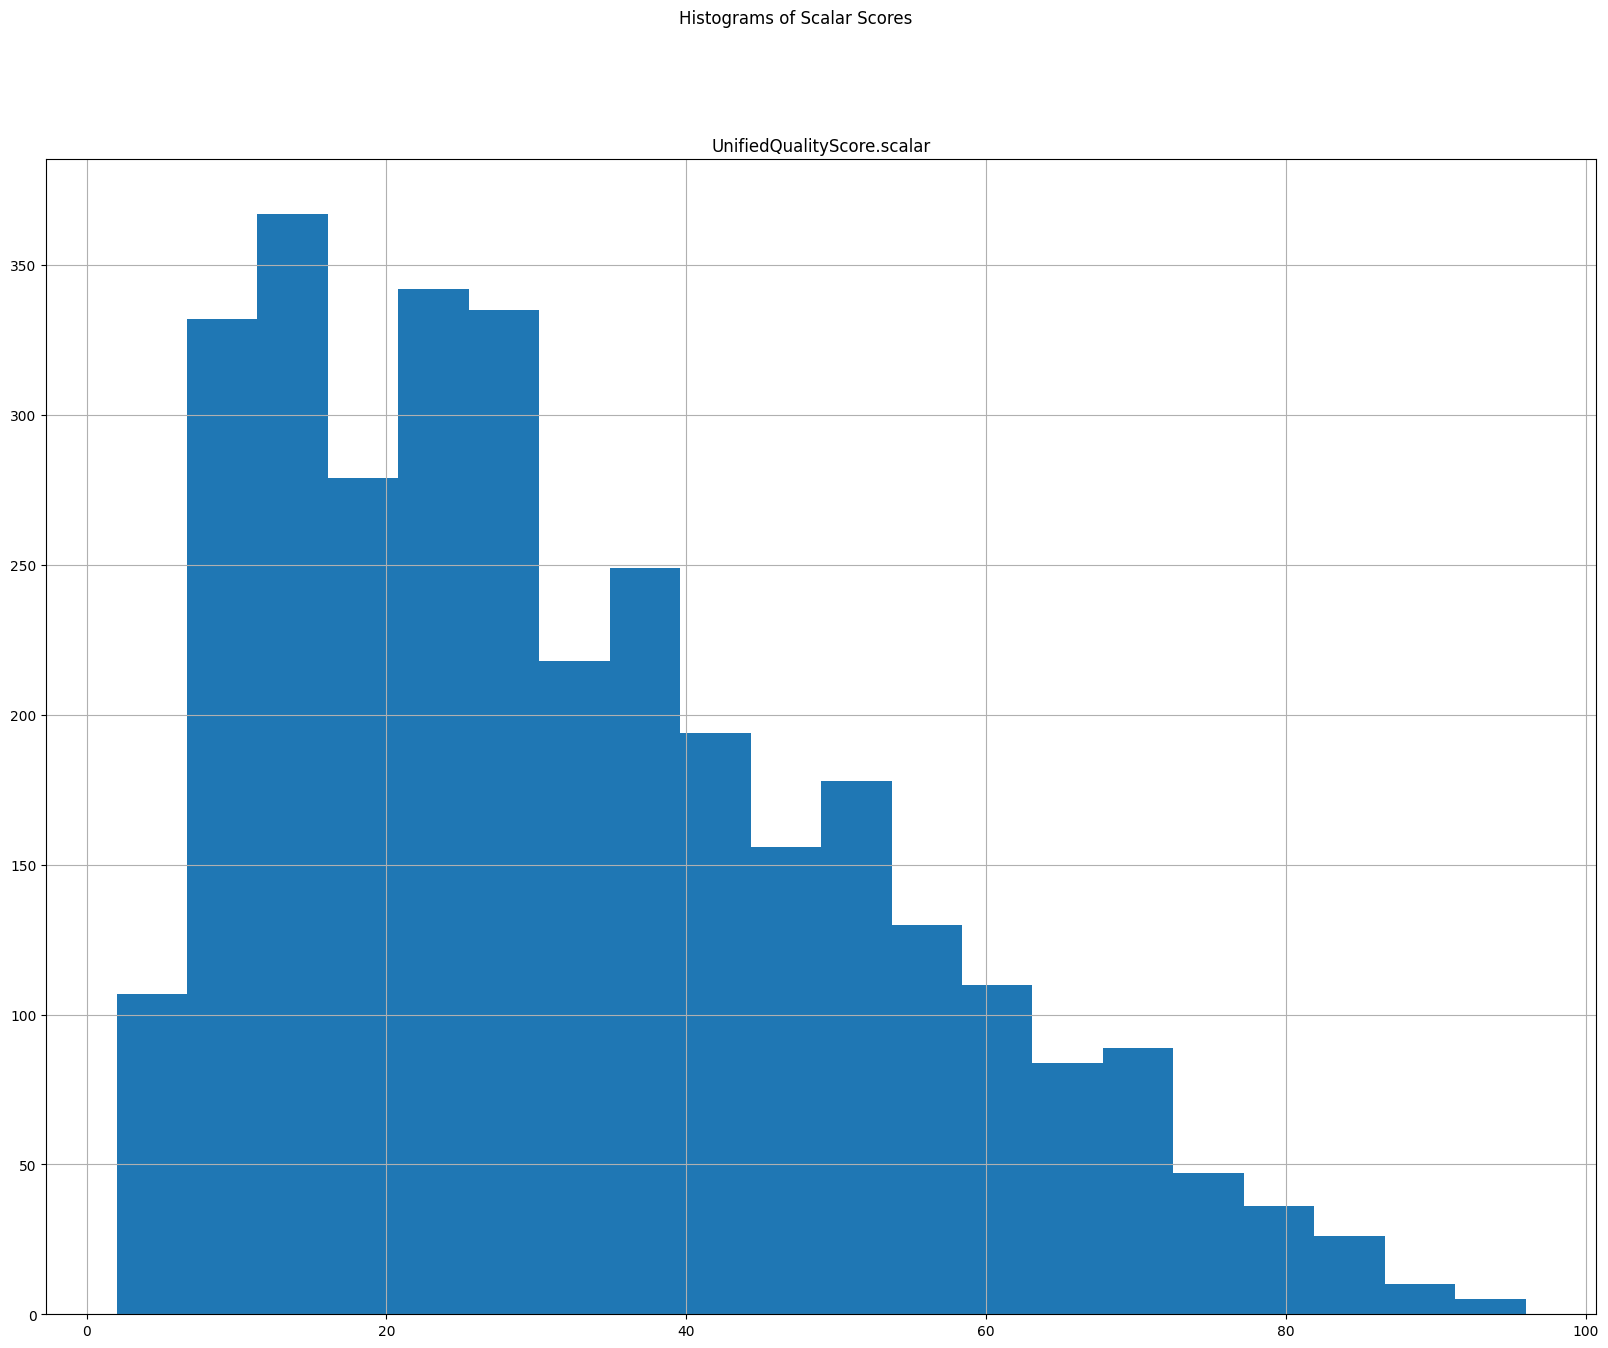

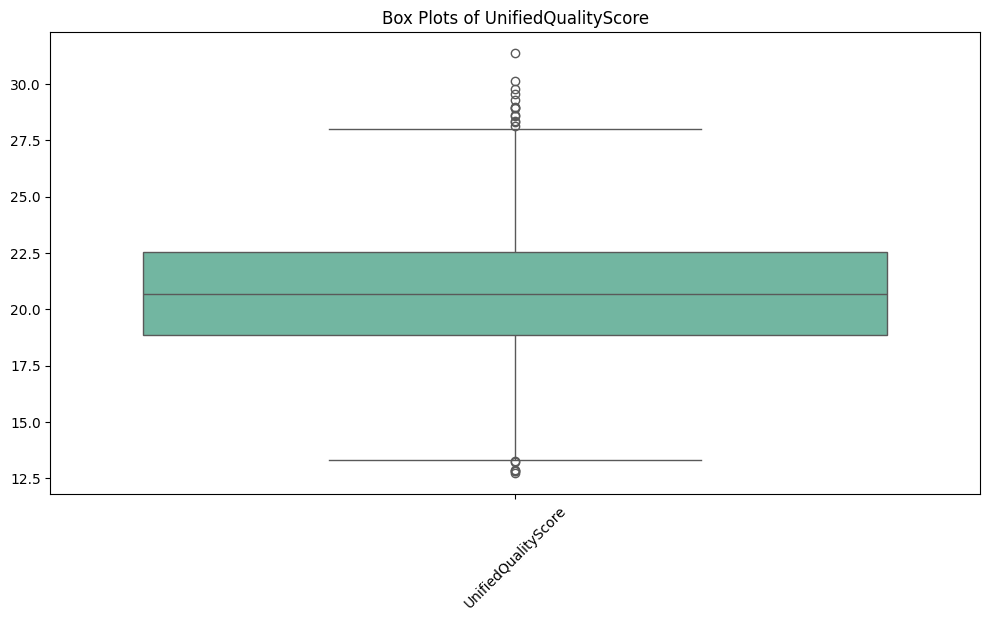

In [3]:
data_path_children = '../..//data/OFIQ_results/children_all_final.csv'

# descriptive_plots_individual(data_path_children)
Unified_quality_score(data_path_children)